In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline


In [23]:
tweet_data=pd.read_csv('test_file.csv')
tweet_data.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,<U+0001F4A5>We LOVE hearing from our current t...,False,0,NaN,14-09-2021 21:21,True,NaN,1.437890e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",METROEHS_,0,False,False,NaN,NaN
1,2,Health is where the heart is - see how you can...,False,0,NaN,14-09-2021 21:19,True,NaN,1.437890e+18,NaN,"<a href=""https://www.careerarc.com"" rel=""nofol...",CVSHealthJobs,0,False,False,-111.886016,33.286643
2,3,RT @nasw: #NASW is excited to kick off our stu...,False,0,NaN,14-09-2021 21:14,False,NaN,1.437890e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NASWMA,7,True,False,NaN,NaN
3,4,RT @Mick_Finnegan: They told me I couldn't do ...,False,0,NaN,14-09-2021 21:12,False,NaN,1.437890e+18,NaN,"<a href=""http://twitter.com/download/android"" ...",BarbaraCurran,19,True,False,NaN,NaN
4,5,#SocialWork #ChildWelfare #WorkforceHealth #So...,False,0,owjbeer,14-09-2021 21:07,False,1.437890e+18,1.437890e+18,8.300650e+17,"<a href=""https://mobile.twitter.com"" rel=""nofo...",owjbeer,0,False,False,NaN,NaN


In [24]:
tweet_data.columns

Index(['Unnamed: 0', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted',
       'longitude', 'latitude'],
      dtype='object')

In [25]:
tweet_data = tweet_data[['text']]

In [26]:
tweet_data

,text
0,<U+0001F4A5>We LOVE hearing from our current t...
1,Health is where the heart is - see how you can...
2,RT @nasw: #NASW is excited to kick off our stu...
3,RT @Mick_Finnegan: They told me I couldn't do ...
4,#SocialWork #ChildWelfare #WorkforceHealth #So...
...,...
1811,#igiftlife #socialwork #igiftlife #socialwork...
1812,RT @sasoscotland: #SASOwebinar:\r\n\r\nThe Imp...
1813,This is brilliant news!\r\n\r\n #socialwork #G...
1814,Fantastic opportunity to join our Workforce De...


In [27]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text) #removes numbers from text
    return text


tweet_data['clean_text']=tweet_data['text'].apply(lambda x: remove_punct(x))
tweet_data.head(5)

,text,clean_text
0,<U+0001F4A5>We LOVE hearing from our current t...,UFAWe LOVE hearing from our current teamUFBUDU...
1,Health is where the heart is - see how you can...,Health is where the heart is see how you can ...
2,RT @nasw: #NASW is excited to kick off our stu...,RT nasw NASW is excited to kick off our studen...
3,RT @Mick_Finnegan: They told me I couldn't do ...,RT MickFinnegan They told me I couldnt do it T...
4,#SocialWork #ChildWelfare #WorkforceHealth #So...,SocialWork ChildWelfare WorkforceHealth Social...


In [29]:
def tokenization(text):
    text = re.split('\W+', text) #splitting each sentence/ tweet into its individual words
    return text

tweet_data['Tweet_tokenized'] = tweet_data['clean_text'].apply(lambda x: tokenization(x.lower()))
tweet_data.head()

,text,clean_text,Tweet_tokenized
0,<U+0001F4A5>We LOVE hearing from our current t...,UFAWe LOVE hearing from our current teamUFBUDU...,"[ufawe, love, hearing, from, our, current, tea..."
1,Health is where the heart is - see how you can...,Health is where the heart is see how you can ...,"[health, is, where, the, heart, is, see, how, ..."
2,RT @nasw: #NASW is excited to kick off our stu...,RT nasw NASW is excited to kick off our studen...,"[rt, nasw, nasw, is, excited, to, kick, off, o..."
3,RT @Mick_Finnegan: They told me I couldn't do ...,RT MickFinnegan They told me I couldnt do it T...,"[rt, mickfinnegan, they, told, me, i, couldnt,..."
4,#SocialWork #ChildWelfare #WorkforceHealth #So...,SocialWork ChildWelfare WorkforceHealth Social...,"[socialwork, childwelfare, workforcehealth, so..."


In [30]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text
    
tweet_data['Tweet_without_stop'] = tweet_data['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
tweet_data.head(5)

,text,clean_text,Tweet_tokenized,Tweet_without_stop
0,<U+0001F4A5>We LOVE hearing from our current t...,UFAWe LOVE hearing from our current teamUFBUDU...,"[ufawe, love, hearing, from, our, current, tea...","[ufawe, love, hearing, current, teamufbuduufef..."
1,Health is where the heart is - see how you can...,Health is where the heart is see how you can ...,"[health, is, where, the, heart, is, see, how, ...","[health, heart, see, make, difference, quality..."
2,RT @nasw: #NASW is excited to kick off our stu...,RT nasw NASW is excited to kick off our studen...,"[rt, nasw, nasw, is, excited, to, kick, off, o...","[rt, nasw, nasw, excited, kick, student, serie..."
3,RT @Mick_Finnegan: They told me I couldn't do ...,RT MickFinnegan They told me I couldnt do it T...,"[rt, mickfinnegan, they, told, me, i, couldnt,...","[rt, mickfinnegan, told, couldnt, difficult, b..."
4,#SocialWork #ChildWelfare #WorkforceHealth #So...,SocialWork ChildWelfare WorkforceHealth Social...,"[socialwork, childwelfare, workforcehealth, so...","[socialwork, childwelfare, workforcehealth, so..."


In [32]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweet_data['Tweet_stemmed'] = tweet_data['Tweet_without_stop'].apply(lambda x: stemming(x))
tweet_data.head()

,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed
0,<U+0001F4A5>We LOVE hearing from our current t...,UFAWe LOVE hearing from our current teamUFBUDU...,"[ufawe, love, hearing, from, our, current, tea...","[ufawe, love, hearing, current, teamufbuduufef...","[ufaw, love, hear, current, teamufbuduufef, se..."
1,Health is where the heart is - see how you can...,Health is where the heart is see how you can ...,"[health, is, where, the, heart, is, see, how, ...","[health, heart, see, make, difference, quality...","[health, heart, see, make, differ, qualiti, he..."
2,RT @nasw: #NASW is excited to kick off our stu...,RT nasw NASW is excited to kick off our studen...,"[rt, nasw, nasw, is, excited, to, kick, off, o...","[rt, nasw, nasw, excited, kick, student, serie...","[rt, nasw, nasw, excit, kick, student, seri, e..."
3,RT @Mick_Finnegan: They told me I couldn't do ...,RT MickFinnegan They told me I couldnt do it T...,"[rt, mickfinnegan, they, told, me, i, couldnt,...","[rt, mickfinnegan, told, couldnt, difficult, b...","[rt, mickfinnegan, told, couldnt, difficult, b..."
4,#SocialWork #ChildWelfare #WorkforceHealth #So...,SocialWork ChildWelfare WorkforceHealth Social...,"[socialwork, childwelfare, workforcehealth, so...","[socialwork, childwelfare, workforcehealth, so...","[socialwork, childwelfar, workforcehealth, soc..."


In [34]:
nltk.download('wordnet')
wordnet = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wordnet.lemmatize(word) for word in text]
    return text

tweet_data['Tweet_lemmatized'] = tweet_data['Tweet_without_stop'].apply(lambda x: lemmatizer(x))
tweet_data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized
0,<U+0001F4A5>We LOVE hearing from our current t...,UFAWe LOVE hearing from our current teamUFBUDU...,"[ufawe, love, hearing, from, our, current, tea...","[ufawe, love, hearing, current, teamufbuduufef...","[ufaw, love, hear, current, teamufbuduufef, se...","[ufawe, love, hearing, current, teamufbuduufef..."
1,Health is where the heart is - see how you can...,Health is where the heart is see how you can ...,"[health, is, where, the, heart, is, see, how, ...","[health, heart, see, make, difference, quality...","[health, heart, see, make, differ, qualiti, he...","[health, heart, see, make, difference, quality..."
2,RT @nasw: #NASW is excited to kick off our stu...,RT nasw NASW is excited to kick off our studen...,"[rt, nasw, nasw, is, excited, to, kick, off, o...","[rt, nasw, nasw, excited, kick, student, serie...","[rt, nasw, nasw, excit, kick, student, seri, e...","[rt, nasw, nasw, excited, kick, student, serie..."
3,RT @Mick_Finnegan: They told me I couldn't do ...,RT MickFinnegan They told me I couldnt do it T...,"[rt, mickfinnegan, they, told, me, i, couldnt,...","[rt, mickfinnegan, told, couldnt, difficult, b...","[rt, mickfinnegan, told, couldnt, difficult, b...","[rt, mickfinnegan, told, couldnt, difficult, b..."
4,#SocialWork #ChildWelfare #WorkforceHealth #So...,SocialWork ChildWelfare WorkforceHealth Social...,"[socialwork, childwelfare, workforcehealth, so...","[socialwork, childwelfare, workforcehealth, so...","[socialwork, childwelfar, workforcehealth, soc...","[socialwork, childwelfare, workforcehealth, so..."


In [ ]:
#Count Vectorizer

In [35]:
from random import sample
clean_tweets=list(set(tweet_data['clean_text']))
sample=sample(clean_tweets,20)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample)
vectorizer.get_feature_names()

['about',
 'abuse',
 'advance',
 'am',
 'amnoon',
 'amp',
 'an',
 'and',
 'animals',
 'anxiety',
 'anyone',
 'are',
 'as',
 'asye',
 'at',
 'barriers',
 'baswstudents',
 'baswuk',
 'being',
 'blog',
 'breakingnews',
 'bsundhu',
 'by',
 'can',
 'caswacts',
 'ccfwe',
 'cfabuk',
 'change',
 'charity',
 'check',
 'children',
 'click',
 'coach',
 'community',
 'conn',
 'consider',
 'covid',
 'csa',
 'darlingtonufabufda',
 'decided',
 'development',
 'difficult',
 'disclosed',
 'do',
 'donate',
 'economic',
 'editorial',
 'education',
 'elizabeth',
 'encourage',
 'especially',
 'et',
 'ever',
 'every',
 'exam',
 'examprep',
 'explains',
 'facts',
 'fantastic',
 'far',
 'feel',
 'for',
 'free',
 'friends',
 'fun',
 'geraldjoseph',
 'get',
 'globalconversation',
 'go',
 'happening',
 'have',
 'he',
 'healcomplexptsd',
 'heard',
 'hello',
 'help',
 'hey',
 'high',
 'httpstcobuxwvshj',
 'httpstcofjfdjs',
 'httpstcogcffzzgk',
 'httpstcohwyupil',
 'httpstcoirdvvktr',
 'httpstcolqimxuiw',
 'httpstc

In [37]:
count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
count_vect_df.head()

,about,abuse,advance,am,amnoon,amp,an,and,animals,anxiety,...,wiltsccareers,with,word,workforce,working,workshop,written,year,you,zolanimetu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Data Visualization

In [38]:
all_clean_words=[]

for i in tweet_data['Tweet_lemmatized']:
    for j in i:
        all_clean_words.append(j)

all_clean_words=list(set(all_clean_words)) #removes duplicate values from the list

clean_words_str=' '.join(all_clean_words)

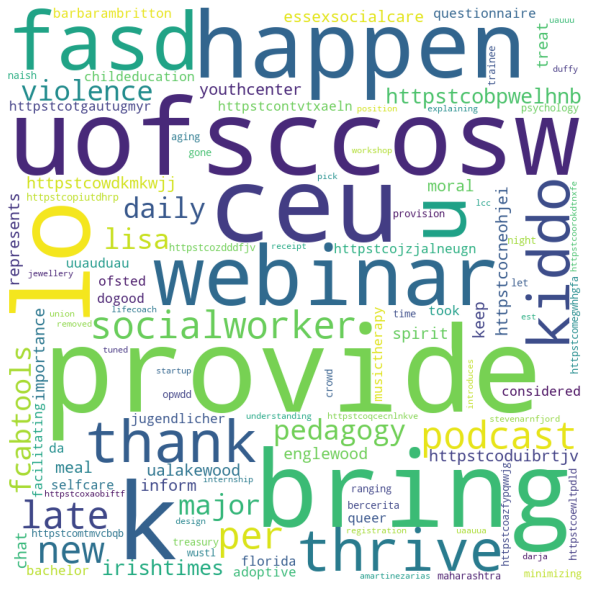

In [39]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(clean_words_str)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()